# Codecademy [NBA Trends Project](https://www.codecademy.com/projects/practice/nba-trends)

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, you'll analyze data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project we've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

You will create several charts and tables in this project, so you'll need to use `plt.clf()` between plots in your code so that the plots don't layer on top of one another.


In [25]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [27]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [28]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### Task 1
The data has been subset for you into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [29]:
knicks_pts_10 = nba_2010[nba_2010.fran_id == "Knicks"]
nets_pts_10 = nba_2010[nba_2010.fran_id == "Nets"]

print("A média de pontos dos Knicks na temporada de 2010 foi de {:.1f} pontos".format(knicks_pts_10.pts.mean()))
print("A média de pontos dos Nets na temporada de 2010 foi de {:.1f} pontos\n".format(nets_pts_10.pts.mean()))

print("A maior pontuação dos Knicks na temporada de 2010 foi de {} pontos".format(knicks_pts_10.pts.max()))
print("A maior pontuação dos Nets na temporada de 2010 foi de {} pontos\n".format(nets_pts_10.pts.max()))

print(knicks_pts_10.describe())
print("\n")
print(nets_pts_10.describe())
display(knicks_pts_10)

A média de pontos dos Knicks na temporada de 2010 foi de 102.1 pontos
A média de pontos dos Nets na temporada de 2010 foi de 92.4 pontos

A maior pontuação dos Knicks na temporada de 2010 foi de 132 pontos
A maior pontuação dos Nets na temporada de 2010 foi de 127 pontos

       year_id  is_playoffs         pts     opp_pts   forecast  point_diff
count     82.0         82.0   82.000000   82.000000  82.000000   82.000000
mean    2010.0          0.0  102.109756  105.926829   0.389794   -3.817073
std        0.0          0.0   12.651068   12.674248   0.196144   14.979103
min     2010.0          0.0   67.000000   81.000000   0.054050  -50.000000
25%     2010.0          0.0   93.000000   96.250000   0.253954  -12.000000
50%     2010.0          0.0  100.500000  105.500000   0.385267   -6.000000
75%     2010.0          0.0  109.750000  114.750000   0.533298    4.000000
max     2010.0          0.0  132.000000  141.000000   0.796355   43.000000


       year_id  is_playoffs         pts     opp_pt

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21725,200910300CHA,2010,Knicks,Hornets,A,0,100,102,L,0.299804,-2
21728,200910310NYK,2010,Knicks,Sixers,H,0,127,141,L,0.540618,-14
21734,200911020NYK,2010,Knicks,Pelicans,H,0,117,111,W,0.533563,6
21739,200911040NYK,2010,Knicks,Pacers,H,0,89,101,L,0.566662,-12
...,...,...,...,...,...,...,...,...,...,...,...
22102,201004070IND,2010,Knicks,Pacers,A,0,105,113,L,0.270306,-8
22110,201004090ORL,2010,Knicks,Magic,A,0,103,118,L,0.096270,-15
22116,201004110NYK,2010,Knicks,Heat,H,0,98,111,L,0.391371,-13
22118,201004120NYK,2010,Knicks,Wizards,H,0,114,103,W,0.693683,11


### Task 2

Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. Based on this value, do you think fran_id and pts are associated? Why or why not?


In [30]:
diff_means_2010 = knicks_pts_10.pts.mean() - nets_pts_10.pts.mean()
print(diff_means_2010)

9.731707317073173


### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?


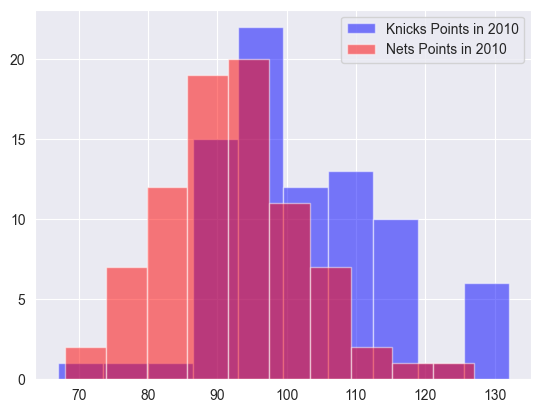

In [31]:
plt.hist(knicks_pts_10.pts , color="blue", label="Knicks Points in 2010", density=True, alpha=0.5)
plt.hist(nets_pts_10.pts , color="red", label="Nets Points in 2010", density=True, alpha=0.5)
plt.legend()
plt.show()

### Task 4
Now, let’s compare the 2010 games to 2014. Replicate the steps from Tasks 2 and 3 using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?


       year_id  is_playoffs         pts     opp_pts   forecast  point_diff
count     82.0         82.0   82.000000   82.000000  82.000000   82.000000
mean    2014.0          0.0   98.585366   99.378049   0.482305   -0.792683
std        0.0          0.0   11.167580   11.529501   0.200933   15.920123
min     2014.0          0.0   73.000000   78.000000   0.107756  -41.000000
25%     2014.0          0.0   90.000000   91.250000   0.330929  -10.750000
50%     2014.0          0.0   98.000000   98.500000   0.501977   -2.000000
75%     2014.0          0.0  106.750000  107.750000   0.627400    8.000000
max     2014.0          0.0  125.000000  129.000000   0.887024   38.000000


       year_id  is_playoffs         pts     opp_pts   forecast  point_diff
count     94.0     94.00000   94.000000   94.000000  94.000000   94.000000
mean    2014.0      0.12766   98.138298   99.180851   0.493130   -1.042553
std        0.0      0.33550   10.666601   10.099465   0.194635   13.860996
min     2014.0      0.0

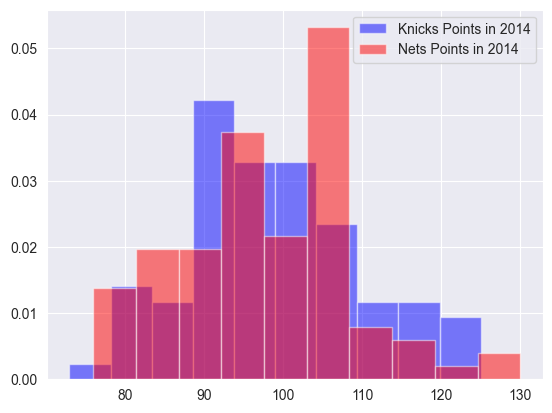

In [34]:
knicks_pts_14 = nba_2014[nba_2014.fran_id == "Knicks"]
nets_pts_14 = nba_2014[nba_2014.fran_id == "Nets"]

print(knicks_pts_14.describe())
print("\n")
print(nets_pts_14.describe())

plt.hist(knicks_pts_14.pts, color="blue", label="Knicks Points in 2014", density=True, alpha=0.5)
plt.hist(nets_pts_14.pts, color="red", label="Nets Points in 2014", density=True, alpha=0.5)
plt.legend()
plt.show()

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?


,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13
...,...,...,...,...,...,...,...,...,...,...,...
22162,201006080BOS,2010,Celtics,Lakers,H,1,84,91,L,0.642039,-7
22163,201006100BOS,2010,Celtics,Lakers,H,1,96,89,W,0.610370,7
22164,201006130BOS,2010,Celtics,Lakers,H,1,92,86,W,0.627127,6
22165,201006150LAL,2010,Celtics,Lakers,A,1,67,89,L,0.361360,-22


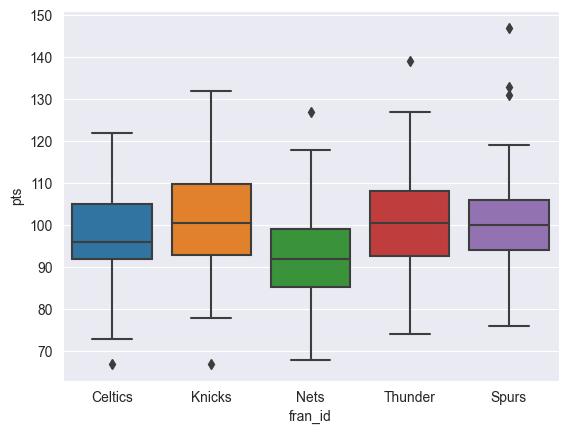

In [37]:
nba_2010 = nba[nba.year_id == 2010]
display(nba_2010)
sns.boxplot(data = nba_2010, x = "fran_id", y = "pts")
plt.show()

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?`


In [38]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


### Task 7

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`.

In [39]:
location_result_proportions = location_result_freq/len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


### Task 8
Using the contingency table created above (Task 6), calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?


In [40]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We're not there*

### Task 9

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?


In [41]:
cov_forecast_point_diff = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(cov_forecast_point_diff)

[[  0.05   1.37]
 [  1.37 186.56]]


### Task 10

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?


In [44]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

PearsonRResult(statistic=0.44020887084680826, pvalue=9.410391573138291e-23)


### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

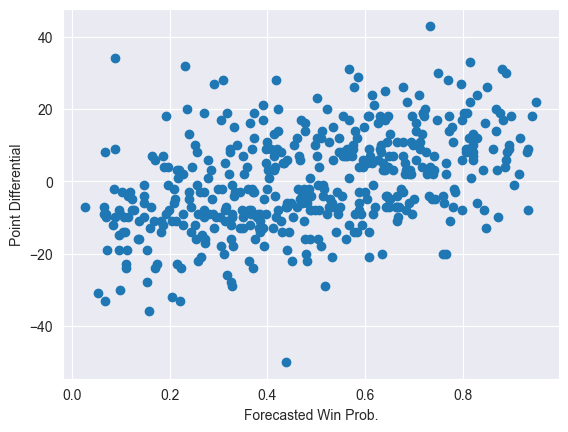

In [46]:
plt.scatter(nba_2010.forecast, nba_2010.point_diff)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()